+ 2020.01.23 時点 OK

+ オリジナルの手書き画像データをラーニングして、model ファイルを出力、 Androidテスト済み

+ [Sketch AI Vegetable (ベータ版)](https://play.google.com/store/apps/details?id=com.oshimamasara.tflite_vegetable)

+ [GitHub](https://github.com/oshimamasara/Let-sDrawVege)

In [1]:
!ls
!pwd

sample_data
/content


In [2]:
!git clone https://github.com/oshimamasara/Let-sDrawVege.git

Cloning into 'Let-sDrawVege'...
remote: Enumerating objects: 457, done.
remote: Counting objects: 100% (457/457), done.
remote: Compressing objects: 100% (426/426), done.
remote: Total 457 (delta 14), reused 451 (delta 10), pack-reused 0
Receiving objects: 100% (457/457), 29.61 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [0]:
!mv /content/Let-sDrawVege/* /content/

# 画像データファイルのセット

In [4]:
import os
from glob import glob                                                           
import cv2 
pngs = glob('./**/*.png', recursive=True)

for j in pngs:
    print(j)
    img = cv2.imread(j)
    print(img)
    cv2.imwrite(j[:-3] + 'jpg', img)



./image/potato/image19.png
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
./image/potato/kissclipart-potato-clip-art-sketch-drawing-cartoon-c96af3146e607a02.png
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  

In [0]:
jpegs = glob('./**/*.jpeg', recursive=True)

for j in jpegs:
    img = cv2.imread(j)
    cv2.imwrite(j[:-4] + 'jpg', img)

In [0]:
!find -type f ! -regex ".*\.\(jpg\)" -delete

In [7]:
!find DATA/broccoli -type f | wc -l
!find DATA/carrot -type f | wc -l
!find DATA/poteto -type f | wc -l

find: ‘DATA/broccoli’: No such file or directory
0
find: ‘DATA/carrot’: No such file or directory
0
find: ‘DATA/poteto’: No such file or directory
0


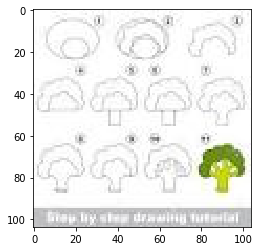

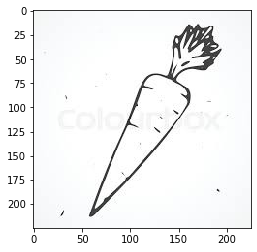

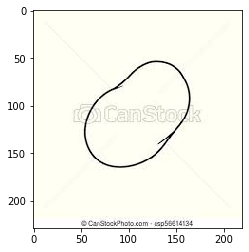

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

bro = Image.open("image/broccoli/image1.jpg")
ca = Image.open("image/carrot/image1.jpg")
po = Image.open("image/potato/image.jpg")
bro = np.asarray(bro)
ca = np.array(ca)
po = np.array(po)
plt.imshow(bro)
plt.show()
plt.imshow(ca)
plt.show()
plt.imshow(po)
plt.show()

# TensorFlow

In [9]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import itertools
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TensorFlow 2.x selected.
TF version: 2.1.0-rc1
Hub version: 0.7.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [20]:
!ls
!ls /root/.keras

android  image	Let-sDrawVege  sample_data
datasets  keras.json


In [18]:
!cp -r image /root/.keras/datasets/
ls /root/.keras/datasets/

data_root = '/root/.keras/datasets/image'

datasets  keras.json


In [21]:
data_root

'/root/.keras/datasets/image'

## 画像データの分類

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [0]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [24]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 366 images belonging to 3 classes.


In [25]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 3)


In [26]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

## レイヤー追加

In [0]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [29]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


In [0]:
feature_extractor_layer.trainable = False

In [31]:
# レイヤーの追加
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
predictions = model(image_batch)

In [33]:
predictions.shape

TensorShape([32, 3])

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [36]:
!cat /root/.keras/datasets/DATA/carrot/carrot-drawing-3.jpg

cat: /root/.keras/datasets/DATA/carrot/carrot-drawing-3.jpg: No such file or directory


## 機械学習開始

In [37]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit(image_data, epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 12.0 steps
Epoch 1/10
12/12 [==============================] - 5s 420ms/step - loss: 1.1616 - acc: 0.7500
Epoch 2/10
12/12 [==============================] - 3s 251ms/step - loss: 0.5283 - acc: 0.9286
Epoch 3/10
12/12 [==============================] - 3s 252ms/step - loss: 0.2797 - acc: 0.9375
Epoch 4/10
12/12 [==============================] - 3s 251ms/step - loss: 0.1836 - acc: 1.0000
Epoch 5/10
12/12 [==============================] - 3s 253ms/step - loss: 0.1340 - acc: 1.0000
Epoch 6/10
12/12 [==============================] - 3s 250ms/step - loss: 0.1023 - acc: 1.0000
Epoch 7/10
12/12 [==============================] - 3s 240ms/step - loss: 0.0870 - acc: 0.9688
Epoch 8/10
12/12 [==============================] - 3s 243ms/step - loss: 0.0729 - acc: 1.0000
Epoch 9/10
12/12 [==============================] - 3s 242ms/step - loss: 0.0633 - acc: 1.0000
Epoch 10/10
12/12 [==============================] - 3s 251ms/step - loss: 0.0556 - acc: 1.0000


In [38]:
print("IN: " + str(model.input_shape))
print("OUT: " + str(model.output_shape))

IN: (None, 224, 224, 3)
OUT: (None, 3)


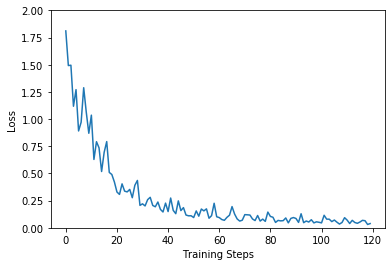

In [39]:
import matplotlib.pylab as plt
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

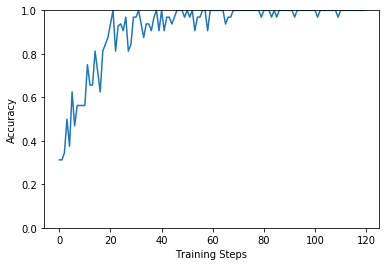

In [40]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

## 学習後の確認

In [41]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Broccoli', 'Carrot', 'Potato'], dtype='<U8')

In [0]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [0]:
label_id = np.argmax(label_batch, axis=-1)

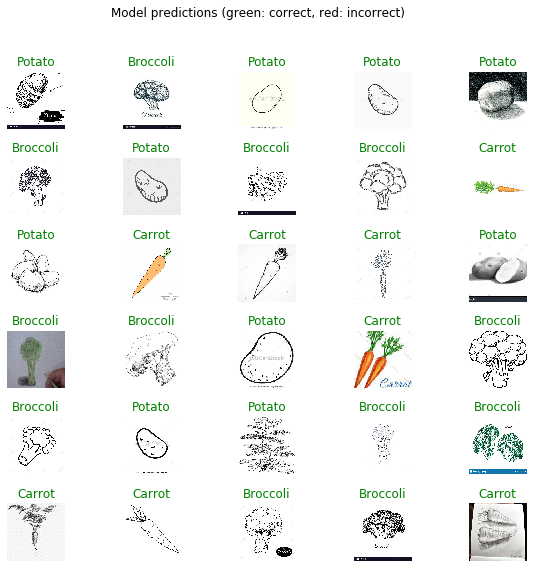

In [44]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## モデルの出力（.pb）

In [48]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
#tf.keras.experimental.export_saved_model(model, export_path)
tf.keras.models.save_model(model,filepath=export_path, save_format="tf")
export_path

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /tmp/saved_models/1579839190/assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1579839190/assets


'/tmp/saved_models/1579839190'

In [50]:
!ls /tmp/saved_models/


1579839190


## 作成したモデルのチェック

In [0]:
reloaded = tf.keras.models.load_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})

In [0]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

In [55]:
abs(reloaded_result_batch - result_batch).max()

0.0

## モデルを .pb から .tflite に変換

In [0]:
import os
model_file = os.listdir("/tmp/saved_models/")
model_file = ''.join(model_file)

In [63]:
saved_model_path = model_file
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: 1579839190/assets


INFO:tensorflow:Assets written to: 1579839190/assets


In [64]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()
open('vege-sketch.tflite', 'wb').write(tflite_model)

8890496

In [65]:
!ls

1579839190  android  image  Let-sDrawVege  sample_data	vege-sketch.tflite


#### 作成した 〇〇.tflite を Android Studio にセット